In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bert = pd.read_csv("df_bert_final_v2.csv")

In [3]:
df_bert

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol,bert_embeddings
0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,0.340623,...,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000,"tensor([ 1.4437e-01, 1.3368e-01, 5.5861e-01,..."
1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,0.472168,...,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000,"tensor([ 2.2761e-01, 8.9886e-02, 6.1213e-01,..."
2,0.127047,0.111979,0.549845,0.036660,0.026879,-0.309649,0.654963,0.205110,-0.097057,0.405619,...,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000,"tensor([ 1.2705e-01, 1.1198e-01, 5.4984e-01,..."
3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,0.356244,...,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000,"tensor([ 1.4764e-01, 1.2772e-01, 5.0945e-01,..."
4,0.153703,0.129806,0.573836,0.061781,0.029730,-0.393227,0.782153,0.130317,-0.070932,0.427625,...,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000,"tensor([ 1.5370e-01, 1.2981e-01, 5.7384e-01,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,0.399848,...,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263,"tensor([ 1.0274e-01, 1.3598e-01, 5.5097e-01,..."
42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,0.487628,...,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263,"tensor([ 2.3325e-01, 1.0972e-01, 5.9854e-01,..."
42974,0.282075,0.149575,0.652933,0.145363,0.003963,-0.429747,0.819131,0.018761,-0.133602,0.517085,...,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263,"tensor([ 0.2821, 0.1496, 0.6529, 0.1454, 0..."
42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,0.474561,...,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263,"tensor([ 1.3649e-01, 1.4831e-01, 5.7047e-01,..."


In [4]:
df_bert = df_bert.drop(['bert_embeddings', 
                        'X..Delta9-THC',
                        'X..CBD',
                        'X..CBN',
                        'X..CBG',
                        'X..CBC',
                        'X..THCV',
                        'X..D-Limonene',
                        'X..Beta-Ocimene',
                        'X..Beta-Myrcene',
                        'X..Beta-Pinene',
                        'X..Linalool',
                        'X..Alpha-Pinene',
                        'X..Camphene',
                        'X..3-Carene',
                        'X..Alpha-Terpinene',
                        'X..Ocimene',
                        'X..Eucalyptol',
                        'X..Terpinolene',
                        'X..Isopulegol',
                        'X..Geraniol',
                        'X..Guaiol',
                        'X..CaryophylleneOxide',
                        'X..Alpha-Bisabolol',
                        'report and species'], axis = 1)

In [5]:
df_bert

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_758,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767
0,0.144370,0.133683,0.558613,0.002472,0.064213,-0.297644,0.649253,0.156834,-0.075428,0.340623,...,-0.696964,0.171215,0.197233,-0.131170,0.210236,-0.728103,0.027258,-0.683708,-0.160281,-0.718498
1,0.227606,0.089886,0.612133,0.085675,0.032208,-0.384907,0.724170,0.154984,-0.061544,0.472168,...,-0.847176,0.149779,0.157919,-0.156806,0.295726,-0.734769,0.099060,-0.779045,-0.190468,-0.830595
2,0.127047,0.111979,0.549845,0.036660,0.026879,-0.309649,0.654963,0.205110,-0.097057,0.405619,...,-0.712079,0.146141,0.174652,-0.146565,0.217158,-0.712819,0.046792,-0.744437,-0.214183,-0.707376
3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,0.356244,...,-0.687137,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824
4,0.153703,0.129806,0.573836,0.061781,0.029730,-0.393227,0.782153,0.130317,-0.070932,0.427625,...,-0.771822,0.114314,0.094989,-0.120709,0.243385,-0.737614,0.100473,-0.767890,-0.144897,-0.775545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,0.399848,...,-0.737568,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808
42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,0.487628,...,-0.846379,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700
42974,0.282075,0.149575,0.652933,0.145363,0.003963,-0.429747,0.819131,0.018761,-0.133602,0.517085,...,-0.912410,0.133490,0.180182,-0.139251,0.378032,-0.731045,0.157516,-0.825618,-0.148141,-0.877954
42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,0.474561,...,-0.786418,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053


In [10]:
df_bert.columns.to_list()

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

In [6]:
df_target = pd.read_csv("df_final_mlp.csv")

In [7]:
df_target = df_target[['X..Delta9-THC',
                        'X..CBD',
                        'X..CBN',
                        'X..CBG',
                        'X..CBC',
                        'X..THCV',
                        'X..D-Limonene',
                        'X..Beta-Ocimene',
                        'X..Beta-Myrcene',
                        'X..Beta-Pinene',
                        'X..Linalool',
                        'X..Alpha-Pinene',
                        'X..Camphene',
                        'X..3-Carene',
                        'X..Alpha-Terpinene',
                        'X..Ocimene',
                        'X..Eucalyptol',
                        'X..Terpinolene',
                        'X..Isopulegol',
                        'X..Geraniol',
                        'X..Guaiol',
                        'X..CaryophylleneOxide',
                        'X..Alpha-Bisabolol']]

In [8]:
df_target

,X..Delta9-THC,X..CBD,X..CBN,X..CBG,X..CBC,X..THCV,X..D-Limonene,X..Beta-Ocimene,X..Beta-Myrcene,X..Beta-Pinene,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,0.003333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,0.003333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,0.003333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,0.003333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


PCA

In [9]:
pca = PCA()
pca_comps = pca.fit_transform(df_bert)

In [10]:
pca_comps

array([[ 1.68784228e+00, -5.64074080e-01, -2.86765890e-01, ...,
         6.41575889e-04,  7.92758158e-04, -3.83121155e-08],
       [-7.16973092e-01, -1.67463501e-01,  4.56301187e-01, ...,
        -1.22481850e-03,  1.69022163e-03, -4.60482800e-08],
       [ 1.11338462e+00, -8.08826378e-01,  1.93931826e-01, ...,
         3.95818799e-04, -1.85161216e-03,  5.41994886e-09],
       ...,
       [-2.58340426e+00,  1.10431639e+00, -8.28987799e-02, ...,
        -8.36653189e-04,  1.69531547e-03,  6.78858503e-08],
       [-2.67519202e-01, -3.62233121e-01, -1.39976426e-01, ...,
         9.75322150e-04, -7.94638968e-04, -3.10711325e-08],
       [ 6.00076043e+00,  8.42423806e-01,  6.79927130e-01, ...,
         7.72562455e-03, -1.01318154e-02,  1.15305577e-08]])

In [11]:
type(pca_comps)

numpy.ndarray

In [12]:
explained_variance = pca.explained_variance_ratio_

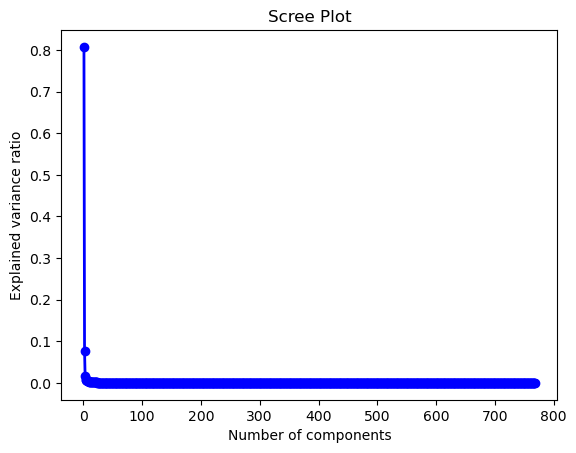

In [13]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [14]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [15]:
n_components_optimal

1

In [16]:
X_reduced = pca.transform(df_bert)[:, :n_components_optimal]

In [17]:
X_reduced

array([[ 1.68784228],
       [-0.71697309],
       [ 1.11338462],
       ...,
       [-2.58340426],
       [-0.2675192 ],
       [ 6.00076043]])

In [18]:
df_bert_pca = pd.DataFrame(X_reduced)
df_bert_pca = df_bert_pca.add_prefix('pca_')
df_bert_pca

,pca_0
0,1.687842
1,-0.716973
2,1.113385
3,2.205398
4,-0.434923
...,...
42972,1.537646
42973,-1.661517
42974,-2.583404
42975,-0.267519


BERT Dataset for kNN and RF

In [19]:
df_bert_pca

,pca_0
0,1.687842
1,-0.716973
2,1.113385
3,2.205398
4,-0.434923
...,...
42972,1.537646
42973,-1.661517
42974,-2.583404
42975,-0.267519


In [20]:
df_target

,X..Delta9-THC,X..CBD,X..CBN,X..CBG,X..CBC,X..THCV,X..D-Limonene,X..Beta-Ocimene,X..Beta-Myrcene,X..Beta-Pinene,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,0.016667,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,0.003333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,0.003333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,0.003333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,0.003333,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [21]:
df_bert_final = pd.concat([df_bert_pca, df_target], axis = 1)

In [22]:
df_bert_final

,pca_0,X..Delta9-THC,X..CBD,X..CBN,X..CBG,X..CBC,X..THCV,X..D-Limonene,X..Beta-Ocimene,X..Beta-Myrcene,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1.687842,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,-0.716973,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1.113385,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,2.205398,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,-0.434923,0.259712,0.001046,0.137931,0.042471,0.175439,0.030928,0.341772,0.666667,0.484375,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,1.537646,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,-1.661517,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,-2.583404,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,-0.267519,0.562557,0.001046,0.103448,0.335907,0.614035,0.154639,0.240506,0.000000,0.273438,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


train test split

In [23]:
X = df_bert_final.drop(['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol'], axis = 1)
y = df_bert_final[['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [25]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

kNN (before feature selection and hyperparameter tuning)

In [26]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [27]:
mean_absolute_error(y_val, y_pred_knreg)

0.09966299353585967

In [28]:
mean_squared_error(y_val, y_pred_knreg)

0.027354268900525627

In [29]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1584833833133778

In [30]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.2947012947177998

In [31]:
#val
r2_score(y_val, y_pred_knreg)

-0.08776128245748517

RF (before feature selection and hyperparameter tuning)

In [32]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [33]:
mean_absolute_error(y_val, y_pred_rfreg)

0.08930712261879102

In [34]:
mean_squared_error(y_val, y_pred_rfreg)

0.027309261110586645

In [35]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.1585236792417392

In [36]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.847998720185152

In [37]:
#val
r2_score(y_val, y_pred_rfreg)

-0.09130394415811215

Feature selection (RF's feature importance)

In [38]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

In [39]:
selector.estimator_.feature_importances_

array([1.])

In [40]:
selector.threshold_

1.0

In [41]:
mask = selector.get_support()

In [42]:
mask

array([ True])

In [43]:
selected_features = X.columns[mask]

In [44]:
selected_X = df_bert_final[selected_features]

In [45]:
selected_X

,pca_0
0,1.687842
1,-0.716973
2,1.113385
3,2.205398
4,-0.434923
...,...
42972,1.537646
42973,-1.661517
42974,-2.583404
42975,-0.267519


In [46]:
import joblib

joblib.dump(selected_X, "selected_X_bert.pkl")
joblib.dump(selector, "selector_bert.pkl")
joblib.dump(rfreg, "rfreg_for_fs_bert.pkl")

['rfreg_for_fs_bert.pkl']

train test split after feature selection

In [47]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [48]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

kNN (after feature selection)

In [49]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [50]:
mean_absolute_error(y_val, y_pred_knreg)

0.09966299353585967

In [51]:
mean_squared_error(y_val, y_pred_knreg)

0.027354268900525627

In [52]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1584833833133778

In [53]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.2947012947177998

In [54]:
#val
r2_score(y_val, y_pred_knreg)

-0.08776128245748517

RF (after feature selection)

In [55]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [56]:
mean_absolute_error(y_val, y_pred_rfreg)

0.08924432924666374

In [57]:
mean_squared_error(y_val, y_pred_rfreg)

0.02730269571490417

In [58]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.15848946591130283

In [59]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.8472102160012028

In [60]:
#val
r2_score(y_val, y_pred_rfreg)

-0.09014487170449048

Hyperparameter tuning (kNN)

In [62]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [63]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [64]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [65]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 15}

In [66]:
joblib.dump(rscv_knn, "rscv_knn_bert.pkl")
joblib.dump(rscv_knn.best_params_, "rscv_knn_bert_best_params.pkl")

['rscv_knn_bert_best_params.pkl']

Hyperparameter tuning (RF)

In [67]:
parameters_rf = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [68]:
rscv_rf = RandomizedSearchCV(rfreg,  
                     parameters_rf,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [69]:
rscv_rf.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [70]:
rscv_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50}

In [71]:
joblib.dump(rscv_rf, "rscv_rf_bert.pkl")
joblib.dump(rscv_rf.best_params_, "rscv_rf_bert_best_params.pkl")

['rscv_rf_bert_best_params.pkl']

kNN (after hyperparameter tuning)

In [72]:
knreg_ht = KNeighborsRegressor(n_neighbors=15, weights='distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [73]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.073392038198339

In [74]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.02177152210750582

In [75]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.14155718426897168

In [76]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9987880438038502

In [77]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.12955075174526093

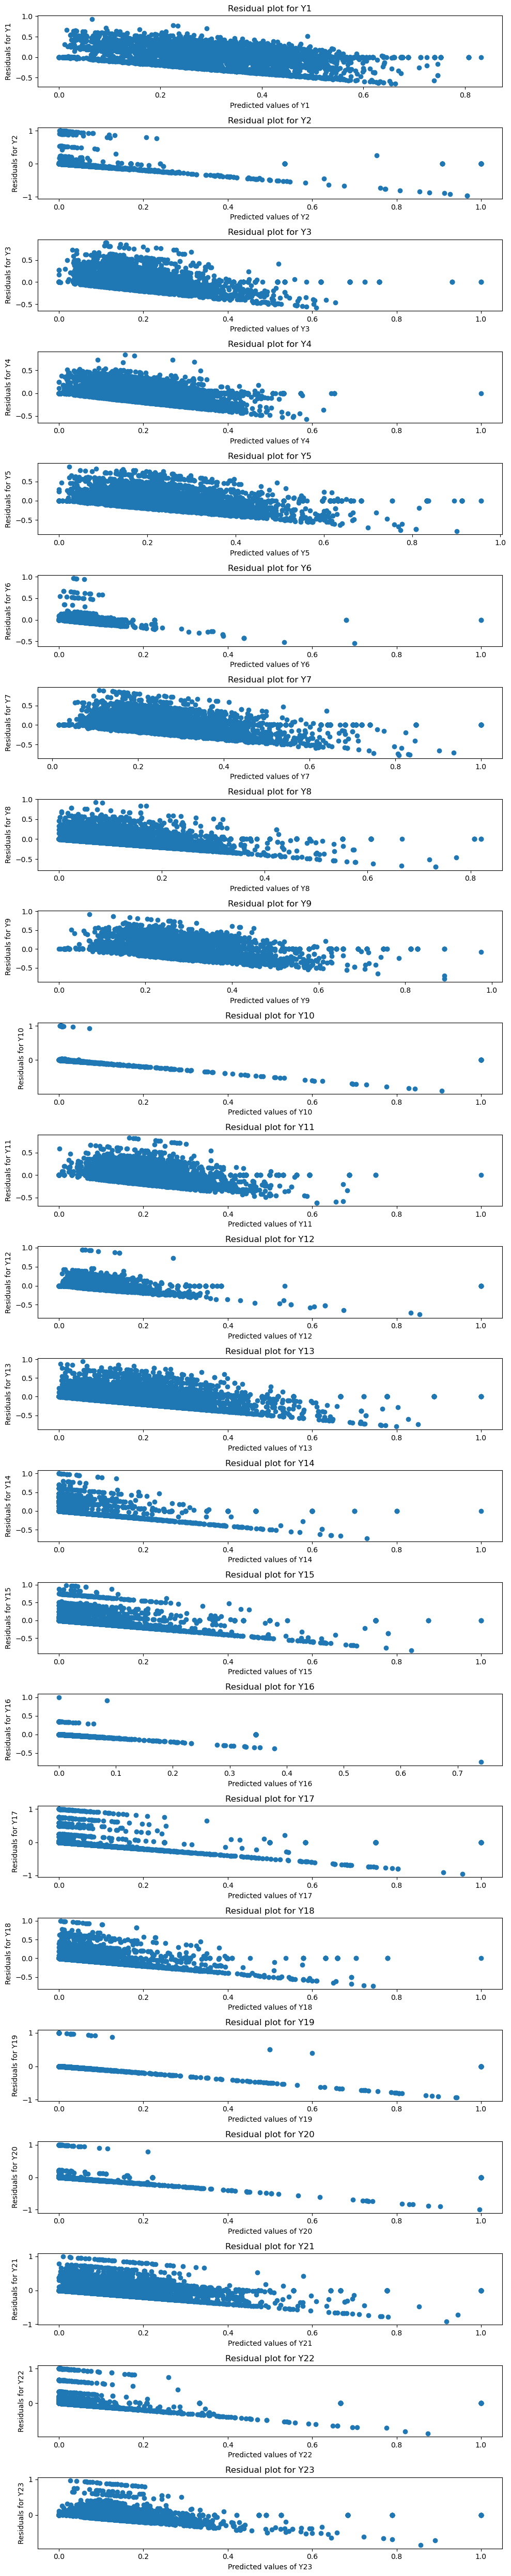

In [78]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_knreg_ht[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_knreg_ht[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

RF (after hyperparameter tuning)

In [79]:
rfreg_ht = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, min_samples_split=2, max_features='auto', max_depth=50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg_ht = rfreg_ht.predict(X_val)
y_pred_rfreg_ht_r2 = rfreg_ht.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [80]:
mean_absolute_error(y_val, y_pred_rfreg_ht)

0.08975077600565527

In [81]:
mean_squared_error(y_val, y_pred_rfreg_ht)

0.025517828913525126

In [82]:
mean_squared_error(y_val, y_pred_rfreg_ht, squared = False)

0.153240223574348

In [83]:
#train
r2_score(y_train1, y_pred_rfreg_ht_r2)

0.7829376920706367

In [84]:
#val
r2_score(y_val, y_pred_rfreg_ht)

-0.01997236534149006

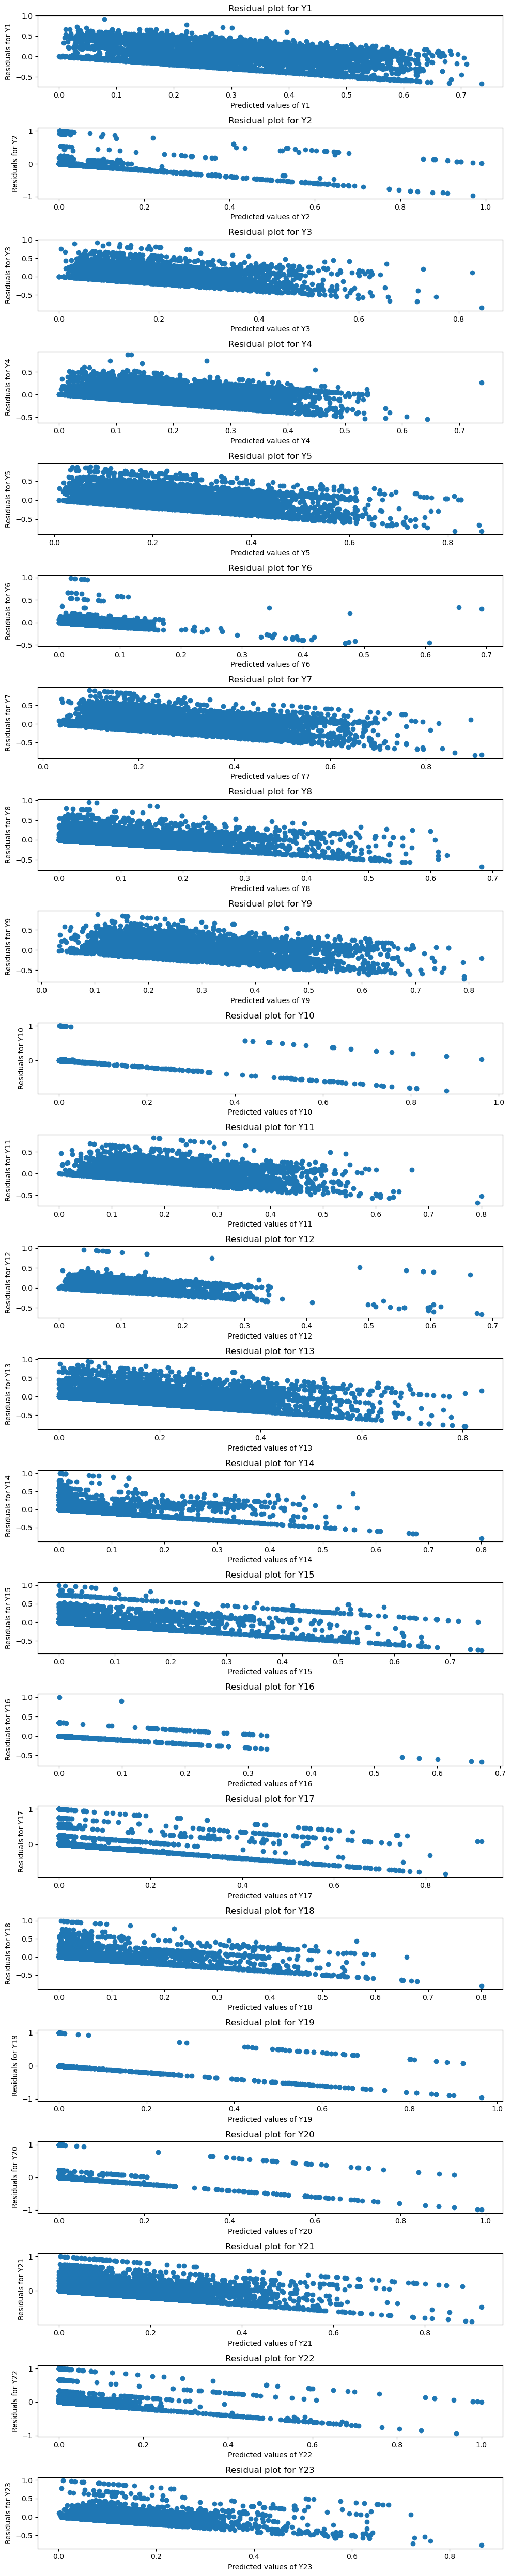

In [85]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_rfreg_ht[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_rfreg_ht[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Predicting on the test set (kNN)

In [86]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [87]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_bert.pkl")
joblib.dump(y_test, "y_test_knreg_bert.pkl")

['y_test_knreg_bert.pkl']

In [88]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.07485340663324065

In [89]:
mean_squared_error(y_test, y_pred_knreg_test)

0.02233129655362959

In [90]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.14392685906497546

In [91]:
r2_score(y_test, y_pred_knreg_test)

0.12716571256270112

Error analysis (kNN)

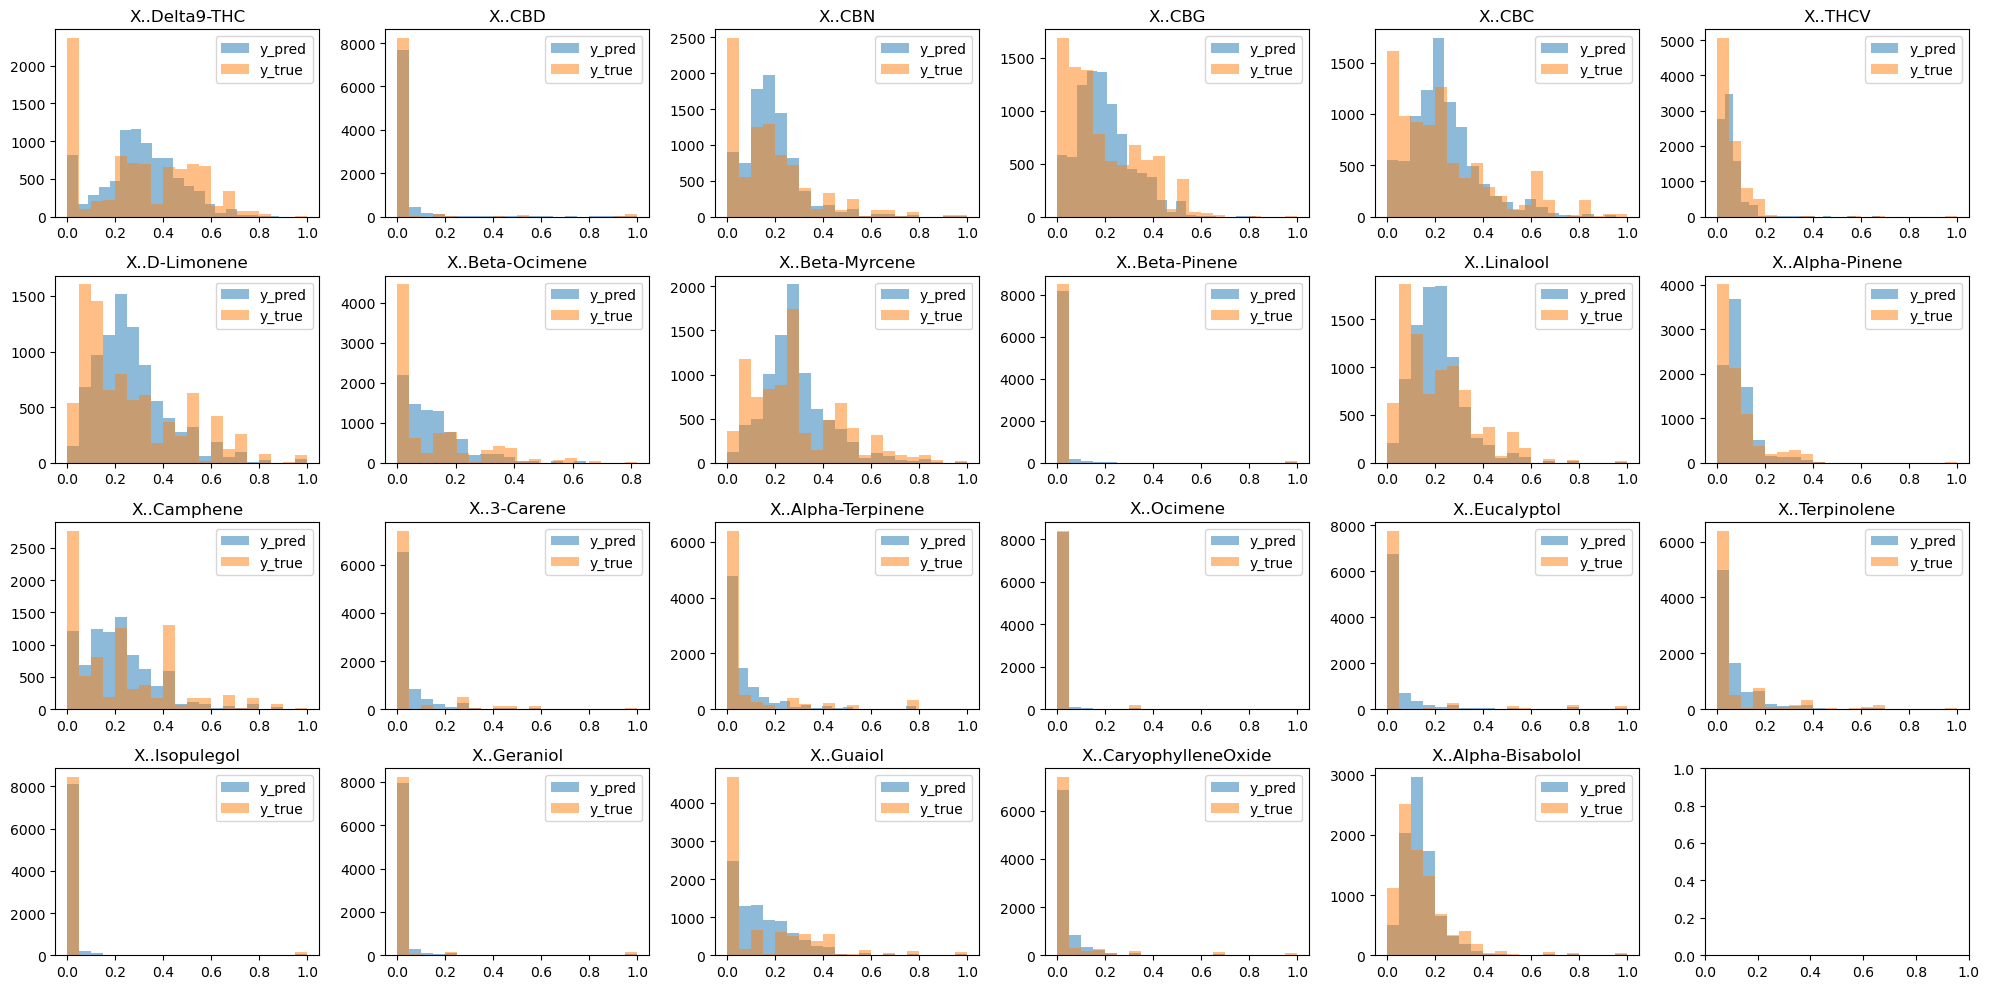

<Figure size 640x480 with 0 Axes>

In [92]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(y_pred_knreg_test[:, i], alpha=0.5, label='y_pred', bins=20)
    axs[row, col].hist(y_test.iloc[:, i], alpha=0.5, label='y_true', bins=20)
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()
plt.savefig('error_hist_knn_lsa_elbow.png')

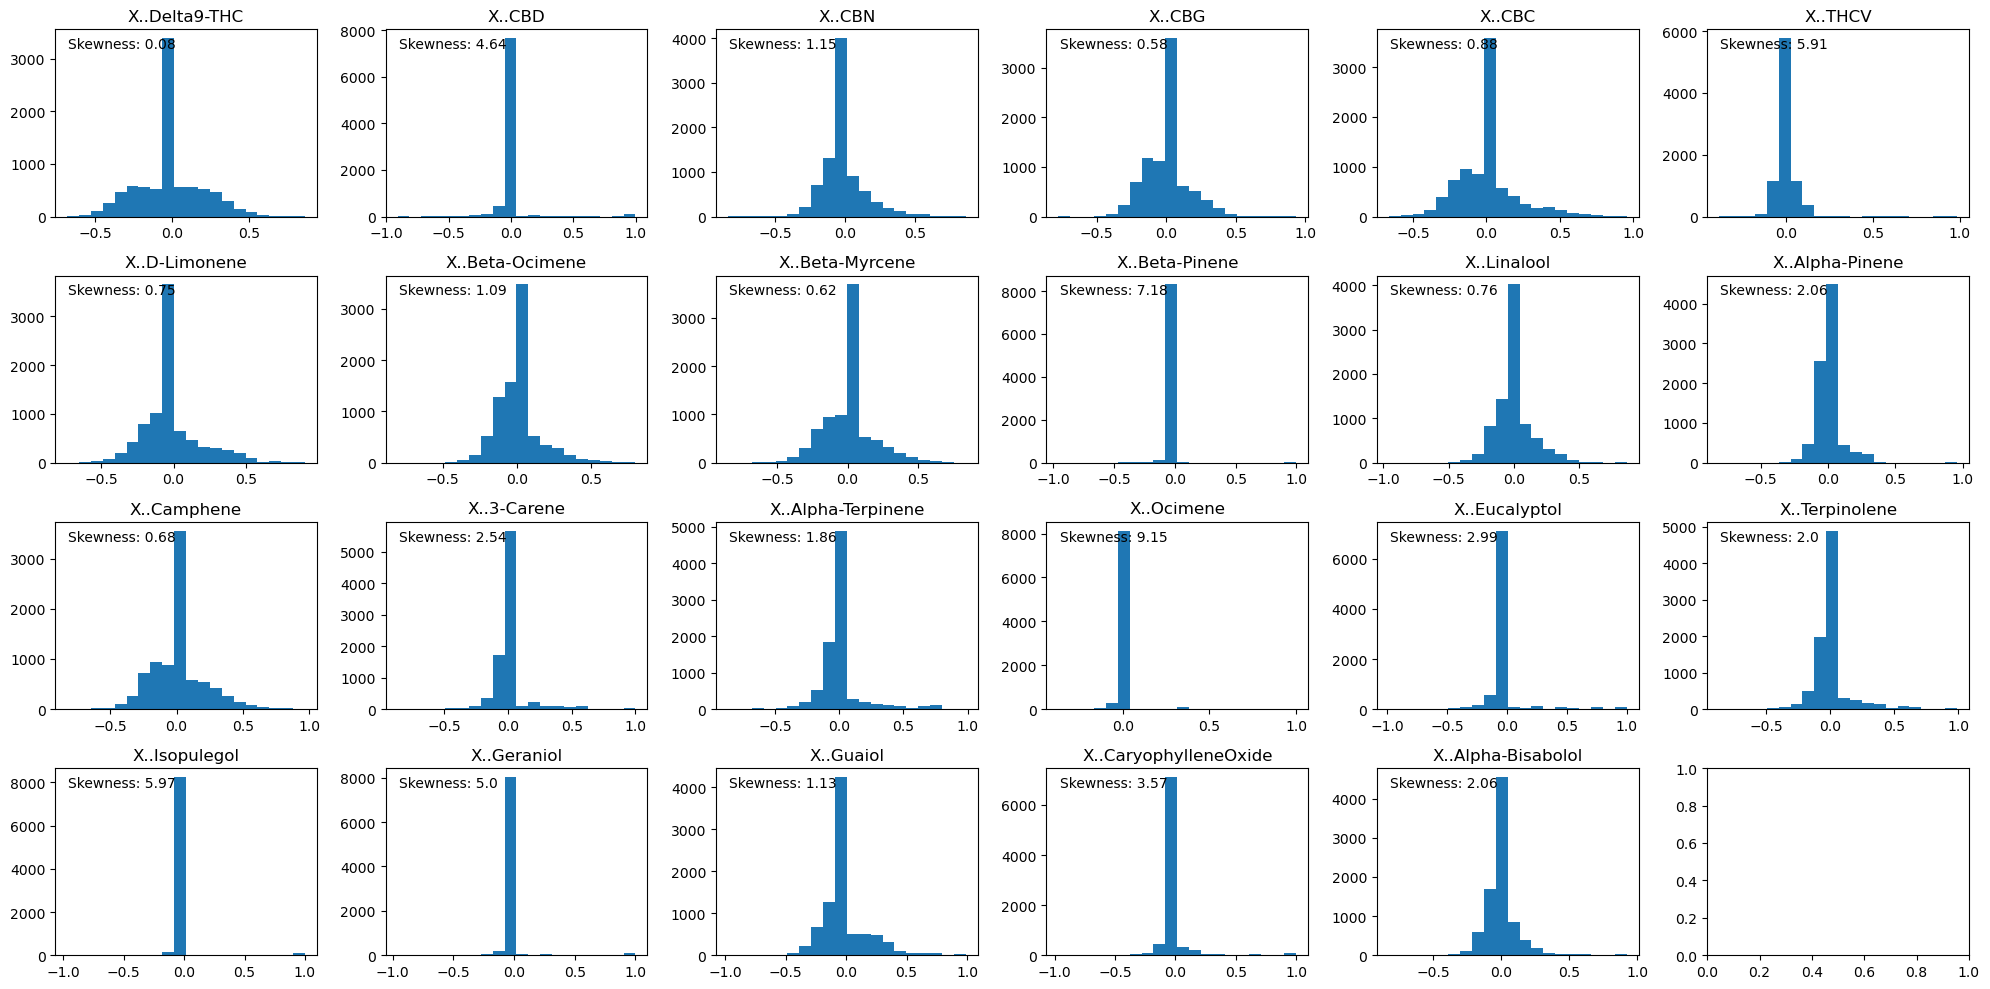

<Figure size 640x480 with 0 Axes>

In [93]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
errors = y_test - y_pred_knreg_test
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(errors.iloc[:, i], bins=20)
    axs[row, col].set_title(column)
    axs[row, col].text(0.05, 0.9, f"Skewness: {np.round(errors.iloc[:, i].skew(), 2)}", transform=axs[row, col].transAxes)

plt.tight_layout()
plt.show()
plt.savefig('error_skew_knn_bert.png')

In [94]:
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_knreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    print(f"Target {i}: Pearson correlation coefficient={r_i}, p-value={p_i}")

Target 0: Pearson correlation coefficient=0.43942299286632114, p-value=0.0
Target 1: Pearson correlation coefficient=0.321861549617219, p-value=2.1770653887719242e-206
Target 2: Pearson correlation coefficient=0.4411445287664877, p-value=0.0
Target 3: Pearson correlation coefficient=0.434466826939201, p-value=0.0
Target 4: Pearson correlation coefficient=0.4225736025721989, p-value=0.0
Target 5: Pearson correlation coefficient=0.3625933207464993, p-value=2.113738069174695e-265
Target 6: Pearson correlation coefficient=0.46855454044744893, p-value=0.0
Target 7: Pearson correlation coefficient=0.4417674658712828, p-value=0.0
Target 8: Pearson correlation coefficient=0.4596479415476407, p-value=0.0
Target 9: Pearson correlation coefficient=0.5206105360150322, p-value=0.0
Target 10: Pearson correlation coefficient=0.44662698768458, p-value=0.0
Target 11: Pearson correlation coefficient=0.3957413204971501, p-value=3.011e-320
Target 12: Pearson correlation coefficient=0.4682612931572336, p-v

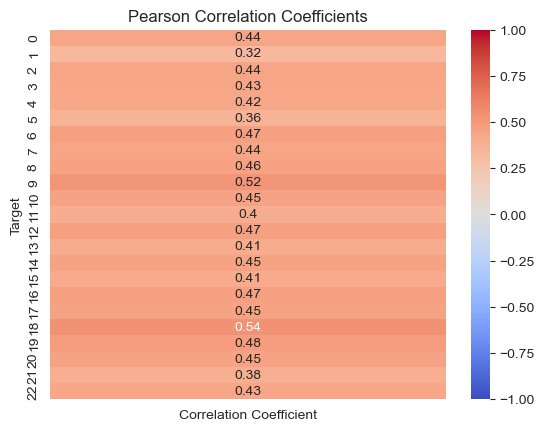

In [95]:
results = []
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_knreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    results.append({
        'Target': i,
        'Correlation Coefficient': r_i,
        'P-value': p_i
    })

df = pd.DataFrame(results)

sns.set_style("whitegrid")
corr_heatmap = sns.heatmap(df.pivot_table(index='Target', columns=None, values='Correlation Coefficient'),
                           annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
corr_heatmap.set_title('Pearson Correlation Coefficients')

plt.savefig('pearson_heatmap_knn_bert.png')

Predicting on the test set (RF)

In [96]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [97]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_bert.pkl")
joblib.dump(y_test, "y_test_rfreg_bert.pkl")

['y_test_rfreg_bert.pkl']

In [98]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.09088609911100544

In [99]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.02614274699242802

In [100]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.1557124314321902

In [101]:
r2_score(y_test, y_pred_rfreg_test)

-0.020241222787047083

Error analysis (RF)

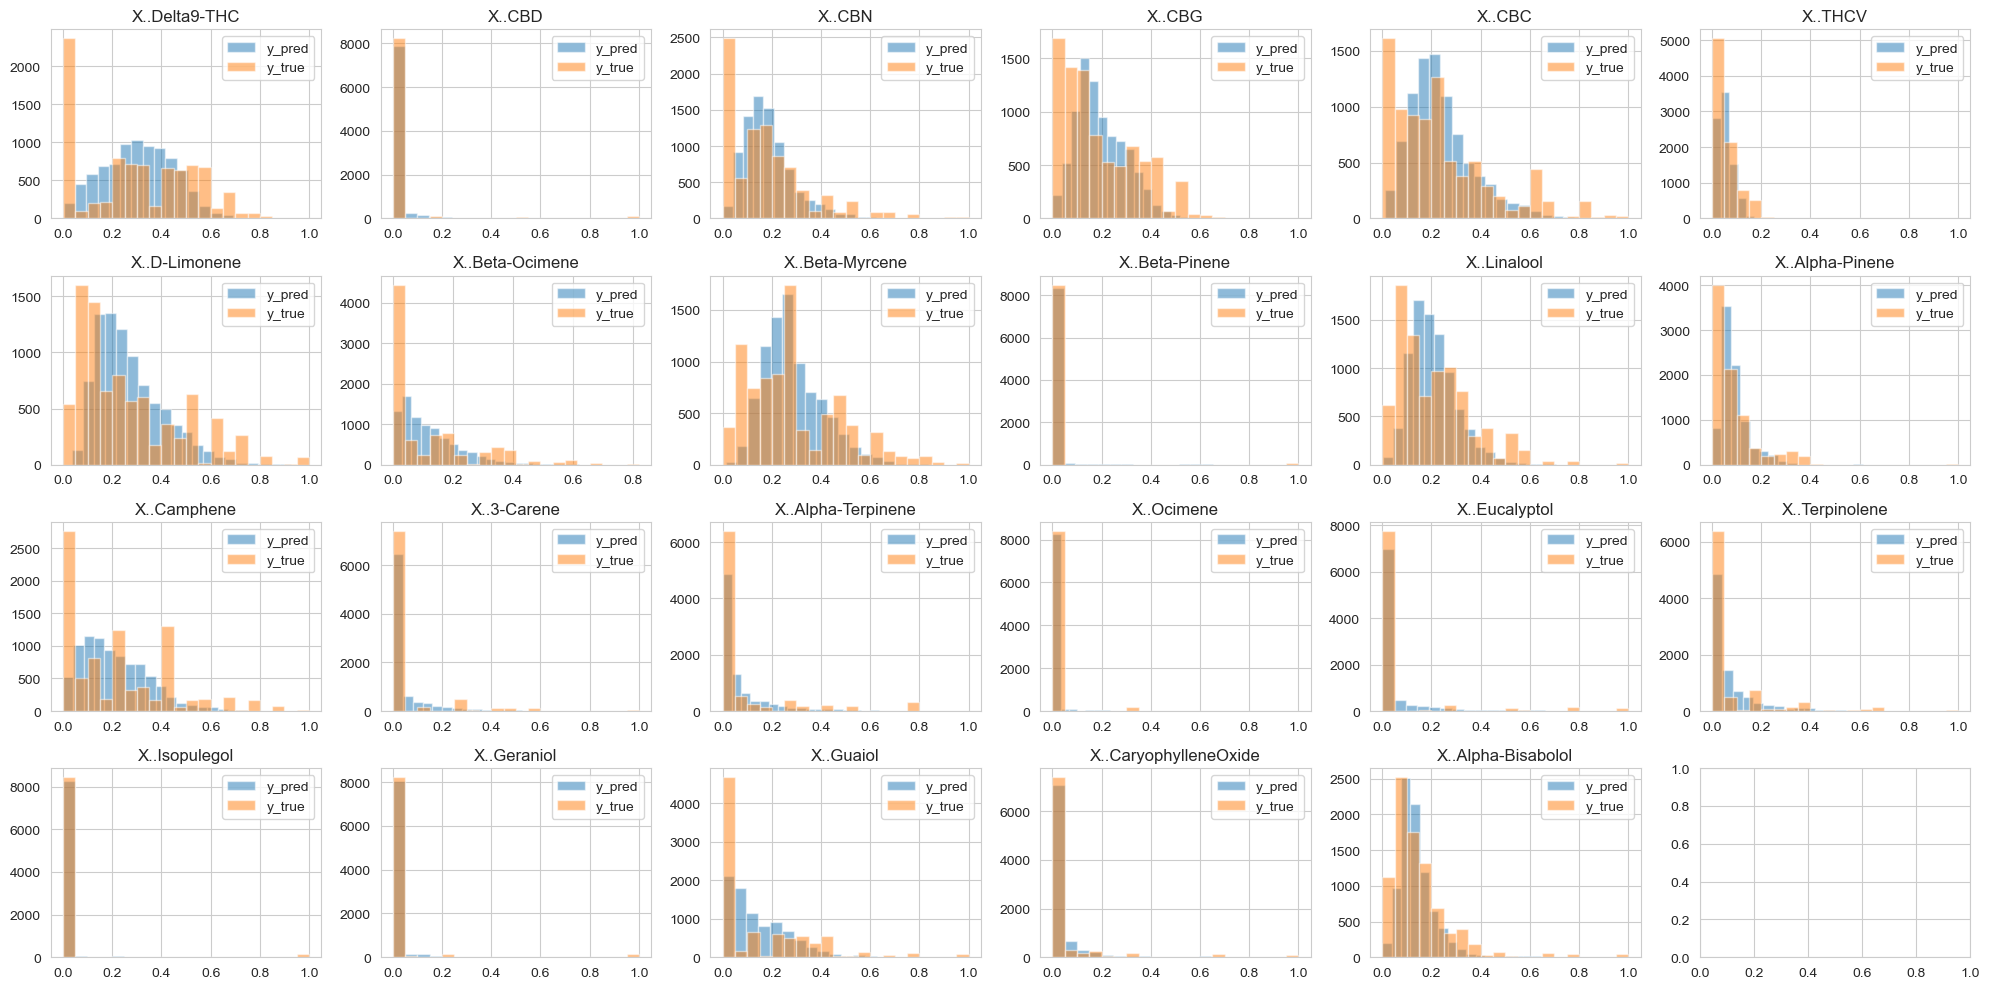

<Figure size 640x480 with 0 Axes>

In [102]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(y_pred_rfreg_test[:, i], alpha=0.5, label='y_pred', bins=20)
    axs[row, col].hist(y_test.iloc[:, i], alpha=0.5, label='y_true', bins=20)
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()
plt.savefig('error_hist_rf_bert.png')

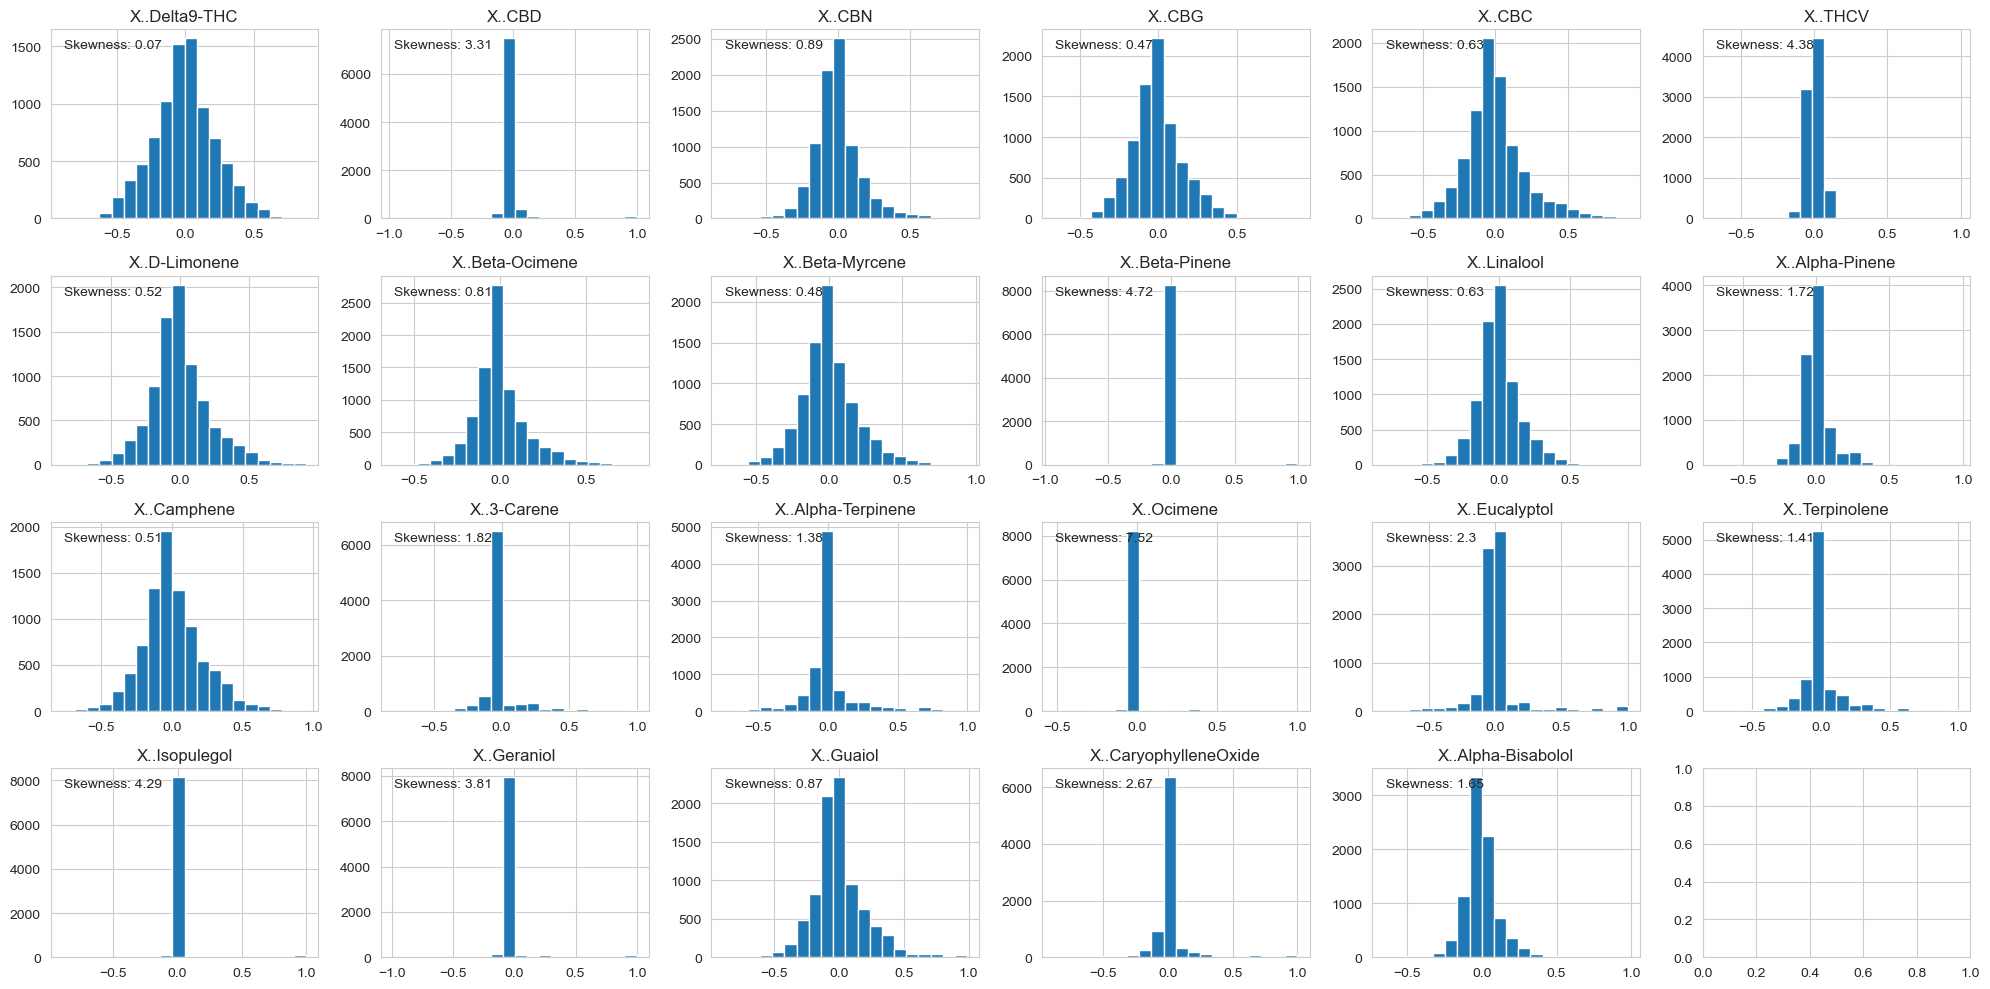

<Figure size 640x480 with 0 Axes>

In [103]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
errors = y_test - y_pred_rfreg_test
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(errors.iloc[:, i], bins=20)
    axs[row, col].set_title(column)
    axs[row, col].text(0.05, 0.9, f"Skewness: {np.round(errors.iloc[:, i].skew(), 2)}", transform=axs[row, col].transAxes)

plt.tight_layout()
plt.show()
plt.savefig('error_skew_rf_bert.png')

In [104]:
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_rfreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    print(f"Target {i}: Pearson correlation coefficient={r_i}, p-value={p_i}")

Target 0: Pearson correlation coefficient=0.2963403140542542, p-value=8.581611012515167e-174
Target 1: Pearson correlation coefficient=0.18712642684577552, p-value=1.3920584534655679e-68
Target 2: Pearson correlation coefficient=0.2866279760660715, p-value=3.1305236455097066e-162
Target 3: Pearson correlation coefficient=0.29394459446953053, p-value=6.729131271683869e-171
Target 4: Pearson correlation coefficient=0.2751028025323733, p-value=4.268008899951906e-149
Target 5: Pearson correlation coefficient=0.22665175366194756, p-value=1.451197925123584e-100
Target 6: Pearson correlation coefficient=0.3199475443494738, p-value=7.871902498808611e-204
Target 7: Pearson correlation coefficient=0.2894087552418052, p-value=1.7050766449674295e-165
Target 8: Pearson correlation coefficient=0.3203787021200331, p-value=2.0962319221613135e-204
Target 9: Pearson correlation coefficient=0.3569702560237127, p-value=1.0125745082840157e-256
Target 10: Pearson correlation coefficient=0.30223840681910824,

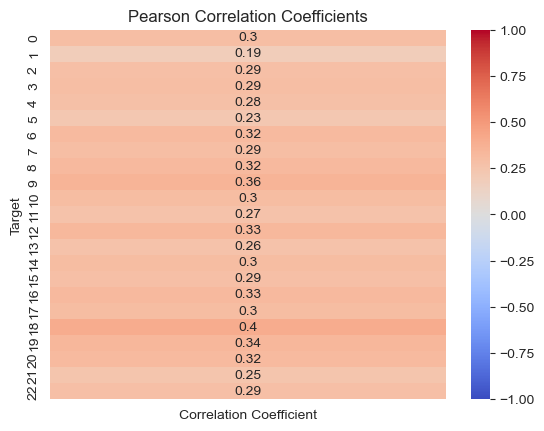

In [105]:
results = []
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_rfreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    results.append({
        'Target': i,
        'Correlation Coefficient': r_i,
        'P-value': p_i
    })

df = pd.DataFrame(results)

sns.set_style("whitegrid")
corr_heatmap = sns.heatmap(df.pivot_table(index='Target', columns=None, values='Correlation Coefficient'),
                           annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
corr_heatmap.set_title('Pearson Correlation Coefficients')

plt.savefig('pearson_heatmap_rf_bert.png')